In [1]:
"""
Artificial Neural Network Model for ClimateWins Weather Prediction
Task 1.5 - Pleasant Weather Classification
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import os

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("=" * 80)
print("ARTIFICIAL NEURAL NETWORK MODEL - CLIMATEWINS WEATHER PREDICTION")
print("=" * 80)

ARTIFICIAL NEURAL NETWORK MODEL - CLIMATEWINS WEATHER PREDICTION


In [2]:
path = r'/Users/davidscheider/anaconda_projects/ClimateWins/02 Data/Prepared Data'

In [3]:
# Load the datasets
print("\n1. Loading datasets...")

weather_df = pd.read_pickle(os.path.join(path, 'weather_scaled.pkl'))
answers_df = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

print(f"Weather data shape: {weather_df.shape}")
print(f"Answers data shape: {answers_df.shape}")


1. Loading datasets...
Weather data shape: (22950, 171)
Answers data shape: (22950, 16)



2. Dropping weather stations: TOURS, ROMA, GDANKS...
Columns to drop: ['TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean']
Weather data shape after dropping stations: (22950, 157)
Answers data shape after dropping stations: (22950, 16)

3. Preparing X and y datasets...
X shape: (22950, 155)
y shape: (22950, 15)

Weather stations in y: ['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']

4. Data statist

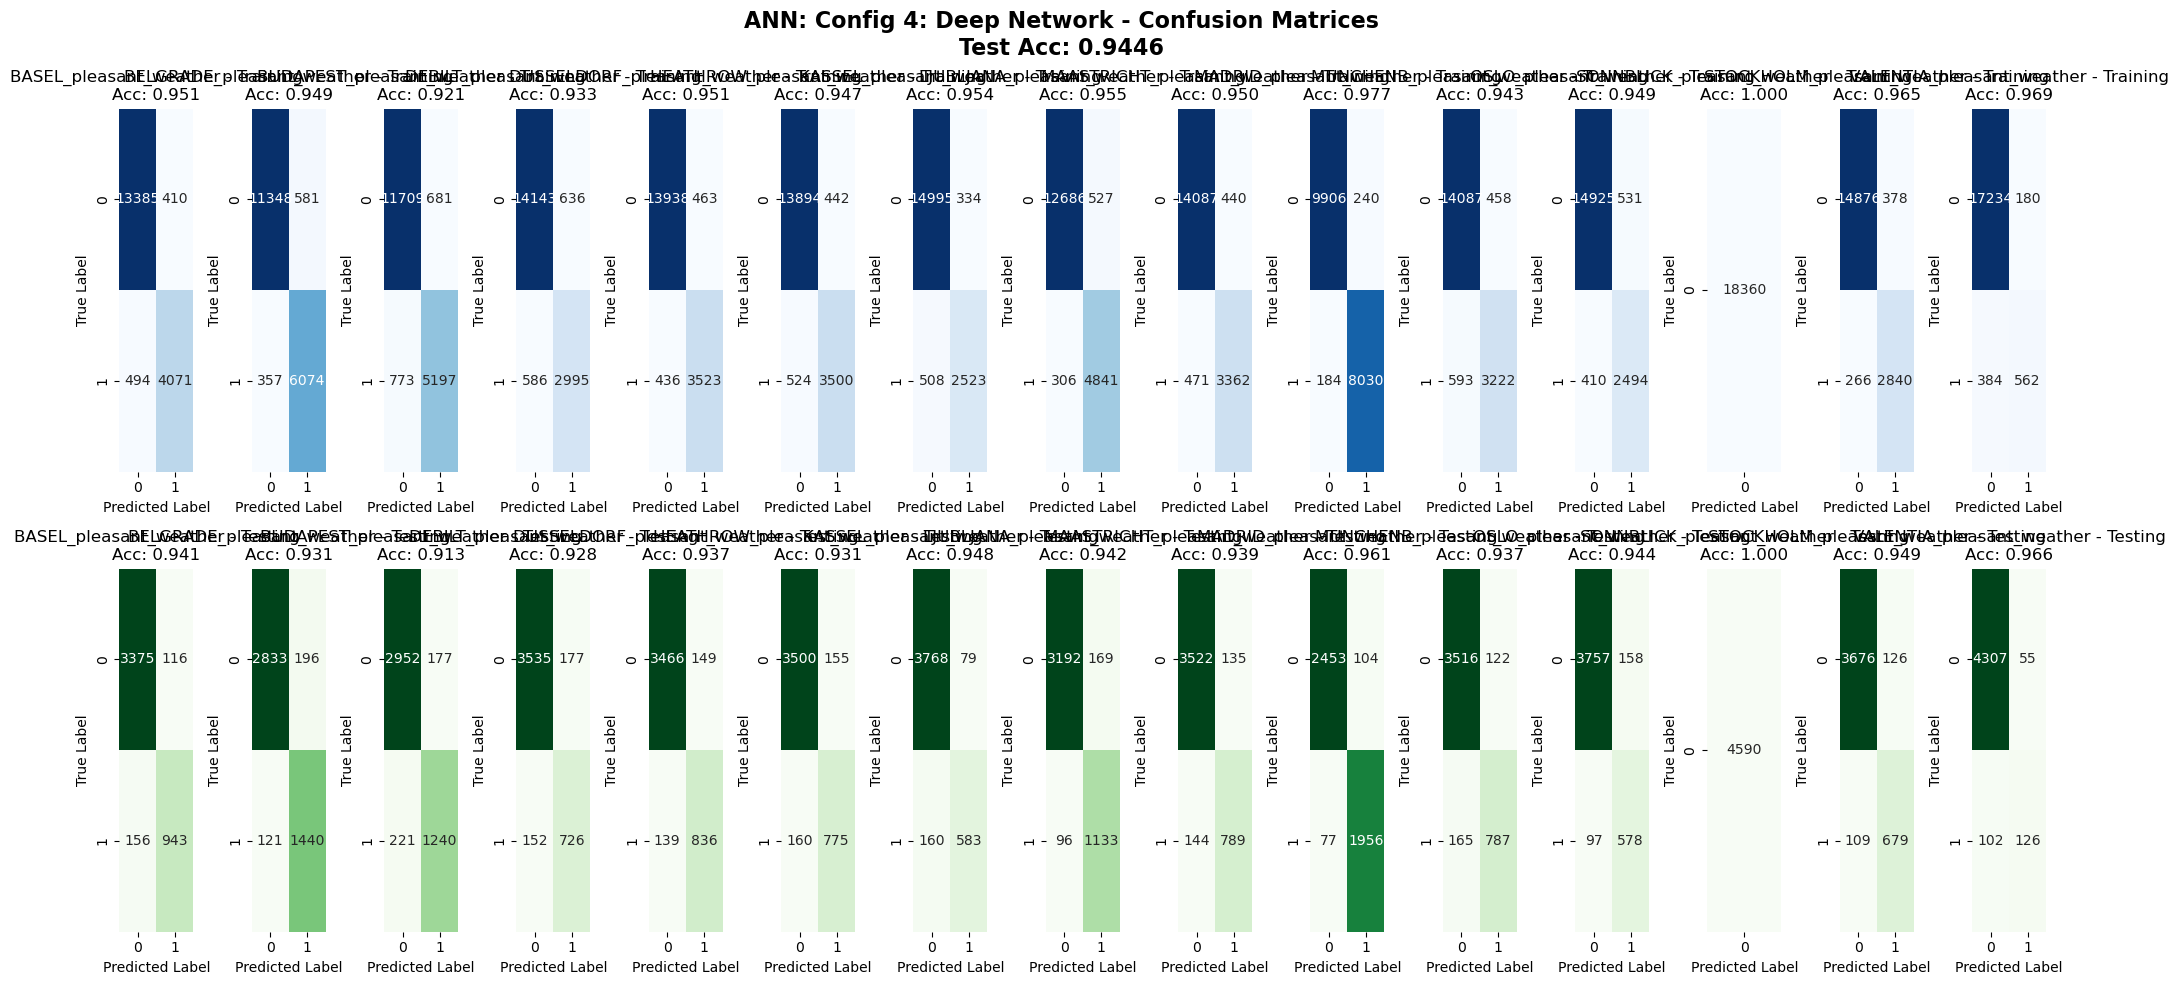

Saved: ann_confusion_matrices_Config_3_Larger_Network.png


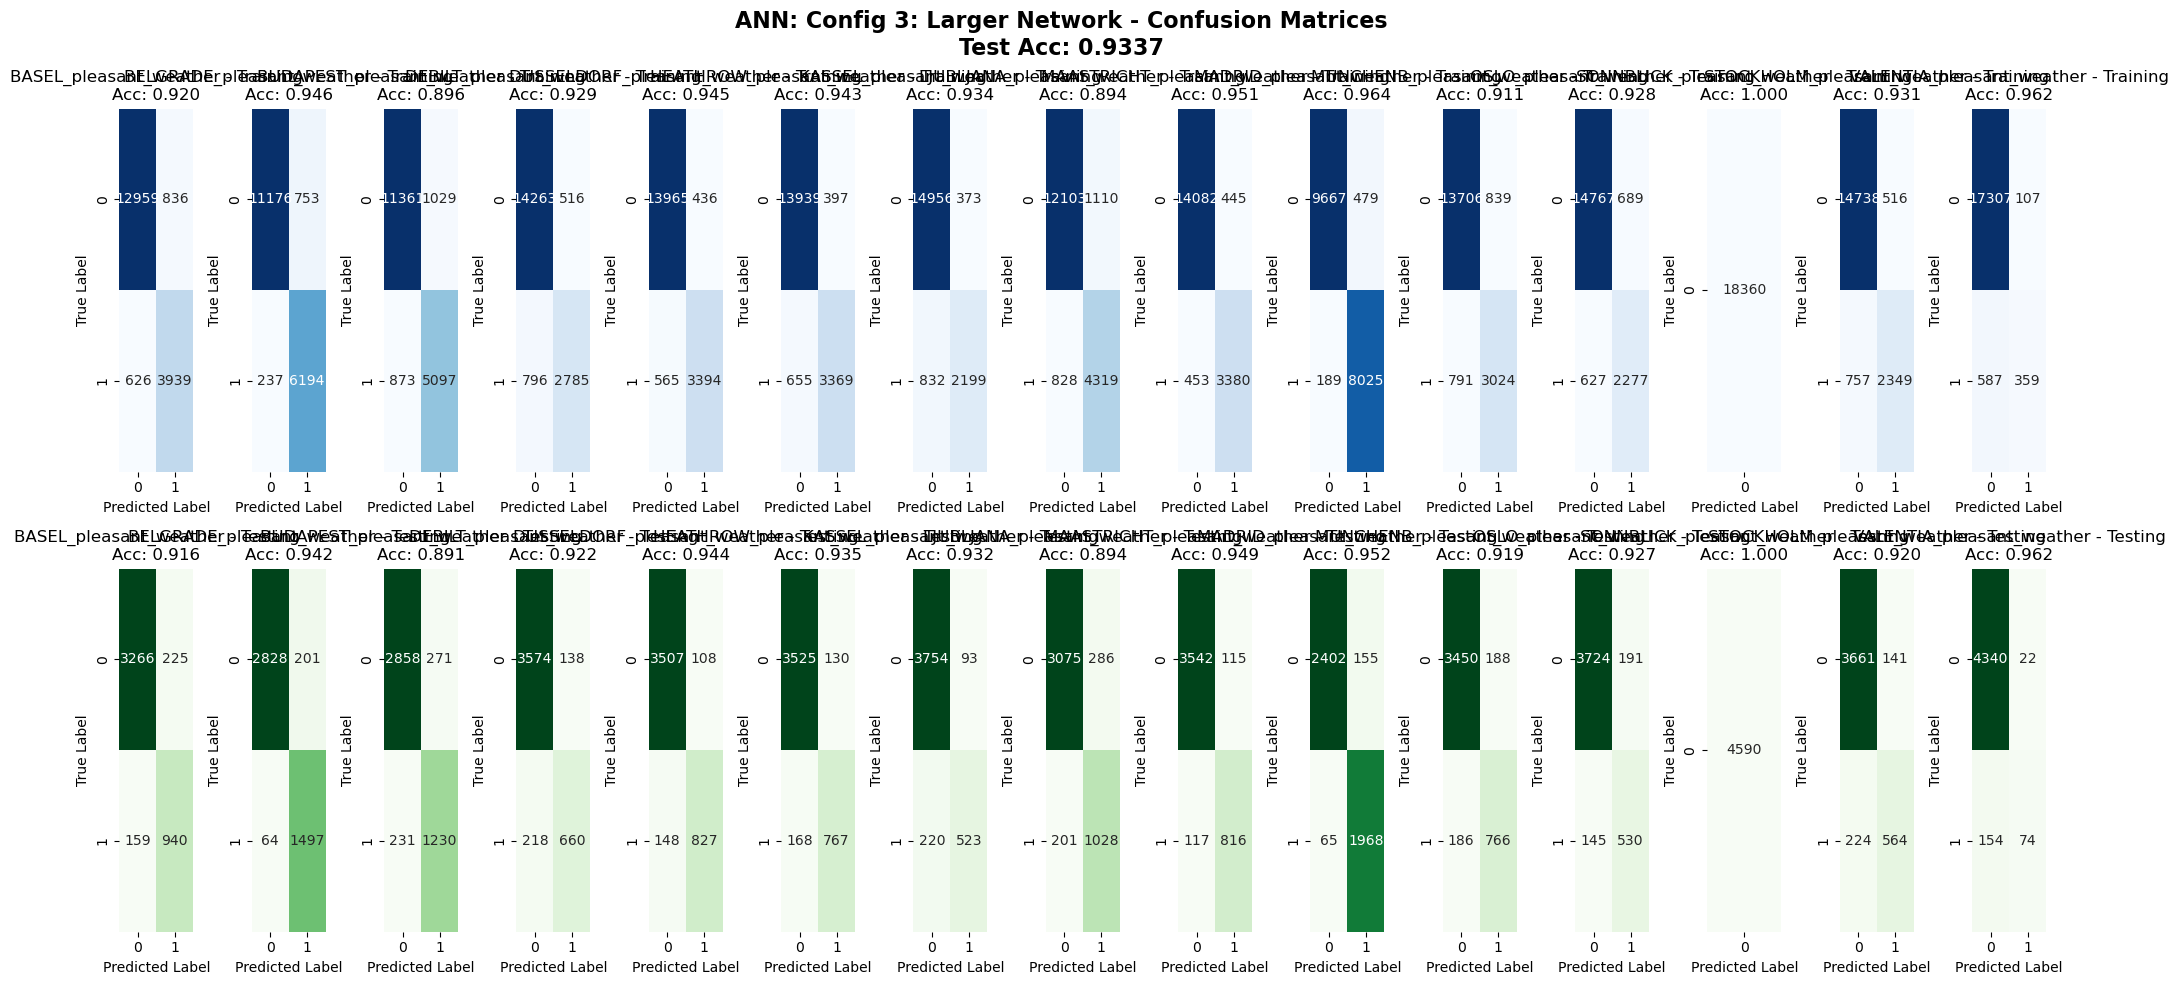

Saved: ann_confusion_matrices_Config_2_Medium_Network.png


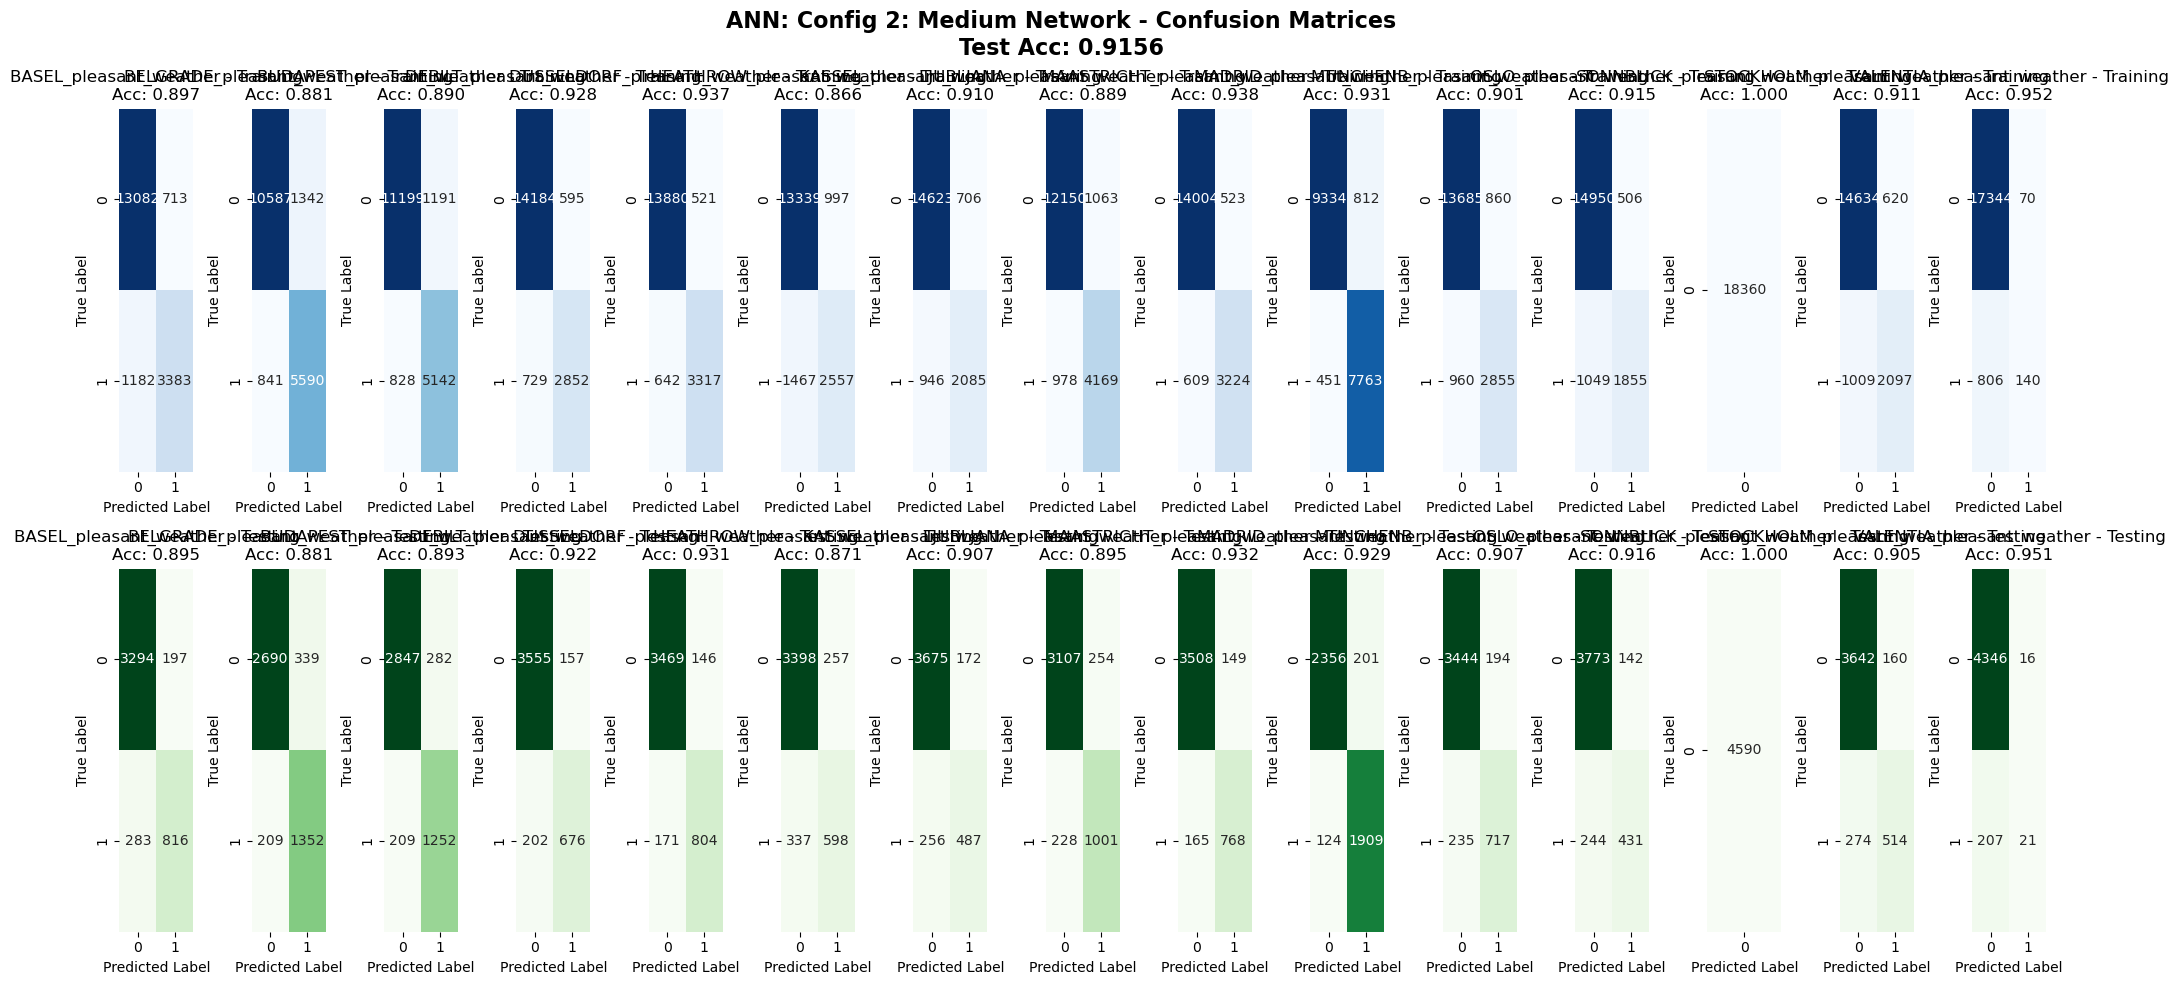


9. Detailed analysis of BEST model by weather station:

BASEL_pleasant_weather:
  Training Accuracy: 0.9508 (95.08%)
  Testing Accuracy:  0.9407 (94.07%)
  Overfitting Gap:   1.00%

BELGRADE_pleasant_weather:
  Training Accuracy: 0.9489 (94.89%)
  Testing Accuracy:  0.9309 (93.09%)
  Overfitting Gap:   1.80%

BUDAPEST_pleasant_weather:
  Training Accuracy: 0.9208 (92.08%)
  Testing Accuracy:  0.9133 (91.33%)
  Overfitting Gap:   0.75%

DEBILT_pleasant_weather:
  Training Accuracy: 0.9334 (93.34%)
  Testing Accuracy:  0.9283 (92.83%)
  Overfitting Gap:   0.51%

DUSSELDORF_pleasant_weather:
  Training Accuracy: 0.9510 (95.10%)
  Testing Accuracy:  0.9373 (93.73%)
  Overfitting Gap:   1.38%

HEATHROW_pleasant_weather:
  Training Accuracy: 0.9474 (94.74%)
  Testing Accuracy:  0.9314 (93.14%)
  Overfitting Gap:   1.60%

KASSEL_pleasant_weather:
  Training Accuracy: 0.9541 (95.41%)
  Testing Accuracy:  0.9479 (94.79%)
  Overfitting Gap:   0.62%

LJUBLJANA_pleasant_weather:
  Training Accura

In [ ]:
# Step 2: Drop the three weather stations with insufficient data
print("\n2. Dropping weather stations: TOURS, ROMA, GDANKS...")

stations_to_drop = ['TOURS', 'ROMA', 'GDANKS']
cols_to_drop = []

for station in stations_to_drop:
    cols_to_drop.extend([col for col in weather_df.columns if station in col])

print(f"Columns to drop: {cols_to_drop}")
weather_df = weather_df.drop(columns=cols_to_drop)
answers_df = answers_df.drop(columns=stations_to_drop, errors='ignore')

print(f"Weather data shape after dropping stations: {weather_df.shape}")
print(f"Answers data shape after dropping stations: {answers_df.shape}")

# Step 3: Prepare X and y datasets
print("\n3. Preparing X and y datasets...")

X = weather_df.drop(columns=['DATE', 'MONTH'], errors='ignore')
y = answers_df.drop(columns=['DATE'], errors='ignore')

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nWeather stations in y: {y.columns.tolist()}")

# Check data statistics before scaling
print("\n4. Data statistics BEFORE scaling:")
print(X.describe().loc[['mean', 'std', 'min', 'max']])

# Step 4: Split data into training and testing sets
print("\n5. Splitting data into training and testing sets (80/20 split)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Step 5: Scale the data
print("\n6. Scaling the data...")
print("Creating StandardScaler to normalize features...")

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier viewing
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print("\nData statistics AFTER scaling:")
print(X_train_scaled_df.describe().loc[['mean', 'std', 'min', 'max']])

print("\n✓ Scaling ensures all features have mean=0 and std=1")

# Step 6: Test multiple ANN configurations
print("\n7. Testing multiple ANN configurations...")
print("=" * 80)

# Define configurations to test
configs = [
    {'name': 'Config 1: Small Network', 'layers': (5, 5), 'max_iter': 500, 'tol': 0.0001},
    {'name': 'Config 2: Medium Network', 'layers': (10, 5), 'max_iter': 500, 'tol': 0.0001},
    {'name': 'Config 3: Larger Network', 'layers': (20, 10, 10), 'max_iter': 1000, 'tol': 0.0001},
    {'name': 'Config 4: Deep Network', 'layers': (50, 25, 10), 'max_iter': 1000, 'tol': 0.00001},
]

results = []

for config in configs:
    print(f"\n{'-'*80}")
    print(f"Testing: {config['name']}")
    print(f"Hidden layers: {config['layers']}")
    print(f"Max iterations: {config['max_iter']}")
    print(f"Tolerance: {config['tol']}")
    print(f"{'-'*80}")
    
    # Train the model
    mlp = MLPClassifier(
        hidden_layer_sizes=config['layers'],
        max_iter=config['max_iter'],
        tol=config['tol'],
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
    
    print("Training model...")
    mlp.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)
    
    # Calculate accuracies for each station
    train_accuracies = {}
    test_accuracies = {}
    
    for station in y.columns:
        train_acc = accuracy_score(y_train[station], y_train_pred[:, y.columns.get_loc(station)])
        test_acc = accuracy_score(y_test[station], y_test_pred[:, y.columns.get_loc(station)])
        
        train_accuracies[station] = train_acc
        test_accuracies[station] = test_acc
    
    overall_train_acc = np.mean(list(train_accuracies.values()))
    overall_test_acc = np.mean(list(test_accuracies.values()))
    
    print(f"\nConverged: {mlp.n_iter_ < config['max_iter']}")
    print(f"Iterations: {mlp.n_iter_}")
    print(f"Training Accuracy: {overall_train_acc:.4f} ({overall_train_acc*100:.2f}%)")
    print(f"Testing Accuracy:  {overall_test_acc:.4f} ({overall_test_acc*100:.2f}%)")
    
    # Store results
    results.append({
        'config': config['name'],
        'layers': config['layers'],
        'train_acc': overall_train_acc,
        'test_acc': overall_test_acc,
        'converged': mlp.n_iter_ < config['max_iter'],
        'iterations': mlp.n_iter_,
        'train_acc_by_station': train_accuracies,
        'test_acc_by_station': test_accuracies,
        'model': mlp,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred
    })

# Step 7: Summary of all configurations
print("\n" + "=" * 80)
print("CONFIGURATION COMPARISON SUMMARY")
print("=" * 80)

comparison_df = pd.DataFrame([
    {
        'Configuration': r['config'],
        'Layers': str(r['layers']),
        'Train Acc': f"{r['train_acc']:.4f}",
        'Test Acc': f"{r['test_acc']:.4f}",
        'Gap': f"{(r['train_acc'] - r['test_acc'])*100:.2f}%",
        'Converged': r['converged'],
        'Iterations': r['iterations']
    }
    for r in results
])

print(comparison_df.to_string(index=False))

# Find best configuration
best_idx = max(range(len(results)), key=lambda i: results[i]['test_acc'])
best_config = results[best_idx]

print(f"\n🏆 BEST CONFIGURATION: {best_config['config']}")
print(f"   Training Accuracy: {best_config['train_acc']:.4f}")
print(f"   Testing Accuracy: {best_config['test_acc']:.4f}")

# Step 8: Create confusion matrices for best 3 configurations
print("\n8. Creating confusion matrices for top 3 configurations...")

# Sort by test accuracy
results_sorted = sorted(results, key=lambda x: x['test_acc'], reverse=True)[:3]

for result in results_sorted:
    fig, axes = plt.subplots(2, len(y.columns), figsize=(20, 10))
    fig.suptitle(f'ANN: {result["config"]} - Confusion Matrices\nTest Acc: {result["test_acc"]:.4f}', 
                 fontsize=16, fontweight='bold')
    
    for idx, station in enumerate(y.columns):
        # Training confusion matrix
        cm_train = confusion_matrix(
            y_train[station], 
            result['y_train_pred'][:, idx]
        )
        
        # Testing confusion matrix
        cm_test = confusion_matrix(
            y_test[station], 
            result['y_test_pred'][:, idx]
        )
        
        # Plot training
        sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
                    ax=axes[0, idx], cbar=False)
        axes[0, idx].set_title(f'{station} - Training\nAcc: {result["train_acc_by_station"][station]:.3f}')
        axes[0, idx].set_ylabel('True Label')
        axes[0, idx].set_xlabel('Predicted Label')
        
        # Plot testing
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', 
                    ax=axes[1, idx], cbar=False)
        axes[1, idx].set_title(f'{station} - Testing\nAcc: {result["test_acc_by_station"][station]:.3f}')
        axes[1, idx].set_ylabel('True Label')
        axes[1, idx].set_xlabel('Predicted Label')
    
    plt.tight_layout()
    filename = f'ann_confusion_matrices_{result["config"].replace(" ", "_").replace(":", "")}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved: {filename}")
    plt.show()

# Step 9: Detailed analysis of best model
print("\n9. Detailed analysis of BEST model by weather station:")
print("=" * 80)

for station in y.columns:
    train_acc = best_config['train_acc_by_station'][station]
    test_acc = best_config['test_acc_by_station'][station]
    
    print(f"\n{station}:")
    print(f"  Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"  Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")
    print(f"  Overfitting Gap:   {(train_acc - test_acc)*100:.2f}%")
    
    if train_acc == 1.0:
        print(f"  ⚠️  Perfect training accuracy - possible overfitting!")
    if test_acc >= 0.95:
        print(f"  ✓ Excellent testing accuracy!")

# Step 10: Compare scaled vs unscaled (optional test)
print("\n10. Testing UNSCALED data for comparison...")
print("Training same best architecture on unscaled data...")

mlp_unscaled = MLPClassifier(
    hidden_layer_sizes=best_config['layers'],
    max_iter=best_config['model'].max_iter,
    tol=best_config['model'].tol,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp_unscaled.fit(X_train, y_train)
y_test_pred_unscaled = mlp_unscaled.predict(X_test)

test_acc_unscaled = []
for station in y.columns:
    acc = accuracy_score(y_test[station], y_test_pred_unscaled[:, y.columns.get_loc(station)])
    test_acc_unscaled.append(acc)

overall_test_acc_unscaled = np.mean(test_acc_unscaled)

print(f"\nScaled Data Test Accuracy:   {best_config['test_acc']:.4f} ({best_config['test_acc']*100:.2f}%)")
print(f"Unscaled Data Test Accuracy: {overall_test_acc_unscaled:.4f} ({overall_test_acc_unscaled*100:.2f}%)")
print(f"Improvement from scaling:    {(best_config['test_acc'] - overall_test_acc_unscaled)*100:.2f}%")

if best_config['test_acc'] > overall_test_acc_unscaled:
    print("\n✓ Scaling IMPROVES model performance!")
else:
    print("\n⚠️  Scaling does not significantly improve performance for this dataset.")

print("\n" + "=" * 80)
print("FINAL RECOMMENDATIONS")
print("=" * 80)
print(f"Best Configuration: {best_config['config']}")
print(f"Hidden Layers: {best_config['layers']}")
print(f"Testing Accuracy: {best_config['test_acc']:.4f}")
print("\nThe neural network with these parameters provides the best balance")
print("between accuracy and avoiding overfitting.")
print("=" * 80)
print("Script completed successfully!")
print("=" * 80)